**2020/21**

# Structured APIs overview
In this lecture we will overview structured APIs available in Spark, namely the DataFrame.


Whenever we need to carry out data analysis, it is almost certain that we have to put the original data as if it was holding some sort of structure, resembling a table. Structured APIs help in that respect.

# Structured APIs - the case of DataFrame

Priori to any explanation, recall that there are both low-level and high-level APIs related to (distributed) collections of data. As mentioned in the previous lecture, we can have collections of Resilient Distributed Dataset (RDD), DataFrame and Dataset. 

The two structured APIs available - **DataFrame** and **Dataset** - are distributed table-like collections with well-defined rows and columns. Each column must have the same number of rows as all the other columns. Each column has a type information that is consistent for every row in the collection. Furthermore, they are immutable and lazy evaluated plans specify transformations/operations to apply to data in ordere to generate output. When we call an action, we instruct Spark to do all those transformations/operations and return the result.

Hereafter we will focus on **DataFrames**. (there is no Dataset with pyspark anyway)

## Columns and rows

- **Columns** represent a simple type like an integer or string, a complex type like an array or map, or a null value

- **Row** is a record of data


In [ ]:
# creates two rows and print them

rs = spark.range(2).collect()
print(type(rs))
rs

In [ ]:
# but what about the required SparkSession instance?



from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("Structured APIs").getOrCreate()

Do we still need the code above?

## Basic data types

The basic data types available in Spark are as follows:

Data Type | Value in Python | API to access or create a data type 
:-:|-|-
`ByteType` | int or long Ensure number within a range -128 to 127 | ByteType()
`ShortType` | int or long  | ShortType()
`IntegerType` | int or long | IntegerType()
`LongType` | long | LongType()
`FloatType` | float | FloatType()
`DoubleType` | float | DoubleType()
`DecimalType` | decimal | DecimalType()
`StringType` | string | StringType()
`BinaryType` | bytearray | BinaryType()
`BooleanType` | decimal | BooleanType()
`TimeStampType` | datetime.datetime | TimeStampType()
`DateType` | datetime.date | DateType()
`ArrayType` | list, tuple, or array | ArrayType()
`MapType` | dict | MapType()
`StructType` | list or tuple | StructType()
`ArrayType` | list, tuple, or array | ArrayType()
`StructField` | list, tuple, or array | StructField(name, dataType, [nullable])

## Operations

For the sake of explanation about operations we can carry out, we will use a dataset about retail sales in a particular day

In [ ]:
! pwd 
! ls -la
! head -n 3 retail_data_2010-12-01.csv
! tail -n 3 retail_data_2010-12-01.csv

In [ ]:
# read the dataset 



In [ ]:
# check the data, both schema and some content


In [ ]:
# some imports

from pyspark.sql import Row
from pyspark.sql.functions import lit, col, column, expr, desc, asc

 ### Columns and expressions
 
Columns are similar to columns in Pandas dataframes. And we may apply expression operations to columns. 

But we cannot manipulate individual columns outside the context of DataFrames. That is, we need transformations to modify the content of a column in a DataFrame.

In [ ]:
# to create a column (no different to Pandas)

col("ColumnName")
column("ColumnName")

In [ ]:
(((col("someCol") + 5) * 200) -6) < col("otherCol")

In [ ]:
expr("(((someCol + 5)* 200) -6 ) < otherCol")

In [ ]:
# Note: we could have set a schema with specified data types in order to read the dataset, as follows:

from pyspark.sql.types import StructField, StructType, StringType, IntegerType, TimestampType, DoubleType

schema = StructType([StructField("InvoiceNo", StringType(),True),
                             StructField("StockCode", StringType(),True),
                             StructField("Description", StringType(),True),
                             StructField("Quantity", IntegerType(),True),
                             StructField("InvoiceDate", TimestampType(),True),
                             StructField("UnitPrice", DoubleType(),True),
                             StructField("CustomerID", DoubleType(),True),
                             StructField("Country", StringType(),True)
                            ])

df_own = 
df_own

### Records and rows

#### Creation

In [ ]:
# creating a row

new_row = Row("555555","85123B","New Product",2016,6,2.1,141131,"Lisbon")
new_row

In [ ]:
# check the type


In [ ]:
# creating a DataFrame

# create a new row and assign the columns name numbers like _1, _2 etc.. 
# If we want a different column name, we need to define the schema 
new_df = 


In [ ]:
# check the type



#### Collecting rows to the Driver and showing
Spark maintains the state of the cluster in the Driver. In order to get the results we need we have to call actions:


|Action | Description|
|:-------|:-------|
|**collect()**|Gets all data from the entire DataFrame and returns a list|
|**take()**|Selects the first rows|
|**first()**|Selects the first row|
|**show()**|Prints out a certain number of rows nicely|
|**limit()**|Returns a limited number of rows|
|**toLocalIterator()**|Similar to collect but returns an iterator|

In [ ]:
# examples of collecting rows

rows_collected = df.limit(10)

rows_collected.

#### Selection

In [ ]:
# function to perform on a DataFrame the equivalent of SQL queries on a table of data


#### Adding/changing columns of a DataFrame

In [ ]:
# adding explicit values to compare (literals)



In [ ]:
# adding/changing a column

df_new_column = 

In [ ]:
# check if the Country has the same value of OtherCountry



In [ ]:
# rename columns

df_renamed_column = 

In [ ]:
# remove columns

df_dropped = 

In [ ]:
df_dropped = 


In [ ]:
# changing a column type

df_coltype = 

#### Filtering Rows
To filter rows, we can create an expression that evaluates to true or false then we filter with that expression.
To do so we can use `filter` or `where`.

Also, if we want unique rows, we should use `distinct` for that matter.


In [ ]:
# use distinct to get the distinct column Country that appear in the DataFrame



In [ ]:
# likewise



#### Random Sample

Sometimes we need to get a random sample of our data, like for example to training a model in machine learning. We can do that with the function `sample()`.

Also, we can have random splits, very helpful when we need to break our dataset into random splits of the original. 
This is often the case of creating both validation and test sets to be used by machine learning algorithms.


In [ ]:
# a simple random sample

df.count()

seed = 5
with_replacement = False
fraction = 0.5
df_random = df.sample(withReplacement=with_replacement, fraction=fraction, seed=seed)  # reduce to 50%

df_random.show(5)
df_random.count()

In [ ]:
# and recalling the original DataFrame



In [ ]:
# split a DataFrame into two but randomly

df_randoms = 

In [ ]:
df_randoms[0].count()

In [ ]:
df_randoms[1].count()

#### Sorting Rows
To sort data, we use the functions `sort` and/or `orderBy`. Additionally, we may specify the direction with the keywords:

|Keyword | Description|
|:-------|:-------|
|**desc**|Data is sorted from the biggest value to the lowest value|
|**asc**|Data is sorted from the lowest value to the biggest value|


In [ ]:
# sorting the DataFrame by UnitPrice but ascending



In [ ]:
# check with expression



In [ ]:
# sorting the DataFrame by Quantity but descending



In [ ]:
# check how sorting will play out

# show the differences between expr <Colname desc> and <Colname>.desc() 



In [ ]:
# sorting the DataFrame by Quantity but descending and UnitPrice but ascending



## API Execution

Worth mentioning that any code to be executed by Spark is subject in advance to a procedure of optimization. This process is carried out by the *Catalyst Optimizer*, which will decide how code will be executed and lays out a plan to do so.

There are three levels to be considered:

**1. Logical planning**

Takes the submitted code and convert it into logical plan, which represents a set set of abstract transformations. It converts the given code into the most optimized version.

The analyser may reject the logical plan if the required table or column name does not exist.  
If the analyser can resolve it the result is passed through the Catalyst Optimizer, which is a set of rules that attempt to optimize the logical plan. 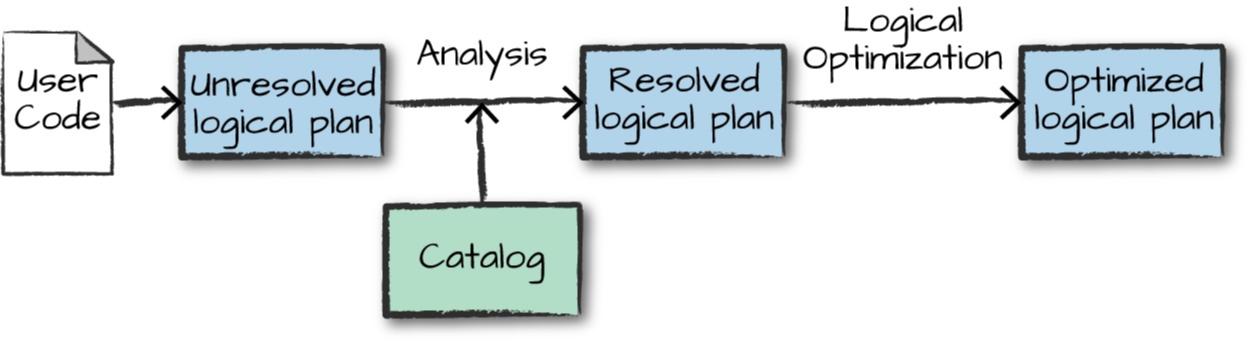

**2. Physical planning**

After successfully creating the optimized logical plan, Spark begins the physical planning process.
This specifies how logical plan will execute in the cluster by generating different physical execution strategies and comparing them using a cost model.

**3. Execution**

After selecting the physical plan to execute, Spark runs all of his this code over RDDs. Spark performs further optimizations at runtime generate native java bytecode, so it can remove entire tasks or stages if that is the case. 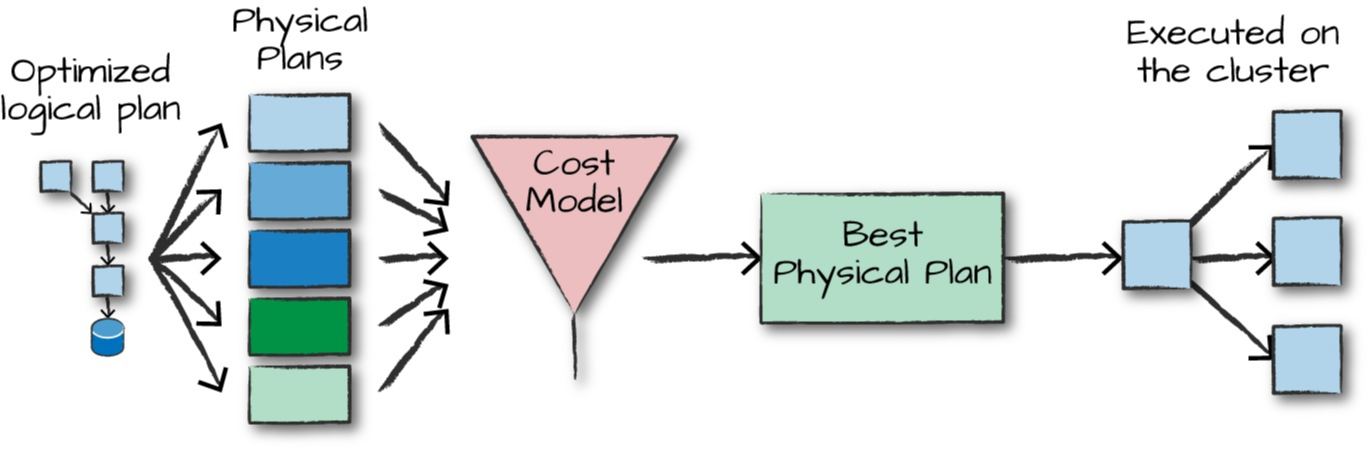

# Exercise

This exercise is about **customer churn** in the Telcom industry. Basically, custom churn - also known as customer attrition, customer turnover, or customer defection - relates to loss of customers.

Our goal is to write down a Spark program that (i) reads a file containing the dataset under analysis and then (ii) provide answers about such data, as follows:

1. Get the number of rows and the number of columns
2. Get the minimum, maximum and average value of five useful columns
3. Count the number of unique values in each column

The dataset we are using can be found in the link https://www.kaggle.com/blastchar/telco-customer-churn

## Context
Companies in the Telcom industry often use customer churn analysis and customer churn rates as one of their key business metrics. This is because the cost of retaining an existing customer is far less than acquiring a new one. Usually, they have customer service branches which attempt to win back defecting clients, because recovered long-term customers can be worth much more to a company than newly recruited clients.

On the other hand, companies usually make a distinction between voluntary churn and involuntary churn. Voluntary churn occurs due to a decision by the customer to switch to another company, whereas involuntary churn occurs due to circumstances such as a customer's relocation to a long-term care facility, death, or the relocation to a distant location. Not surprisingly, data analysis tends to focus on voluntary churn.


**Column Description**


| Column     | Type       | Description |
|--------  |---------  |: --------- |
| **customerID** | String | Customer ID |
| **gender** | String | Whether the customer is a male or a female |
| **SeniorCitizen** | Integer | Whether the customer is a senior citizen or not (1, 0) |
| **Partner** | String | Whether the customer has a partner or not (Yes, No) |
| **Dependents** | String | Whether the customer has dependents or not (Yes, No) |
| **tenure** | Integer | Number of months the customer has stayed with the company |
| **PhoneService** | String | Whether the customer has a phone service or not (Yes, No) |
| **MultipleLines** | String | Whether the customer has multiple lines or not (Yes, No, No phone service) |
| **InternetService** | String | Customer’s internet service provider (DSL, Fiber optic, No) |
| **OnlineSecurity** | String | Whether the customer has online security or not (Yes, No, No internet service) |
| **OnlineBackup** | String | Whether the customer has online backup or not (Yes, No, No internet service) |
| **DeviceProtection** | String | Whether the customer has device protection or not (Yes, No, No internet service) |
| **TechSupport** | String | Whether the customer has tech support or not (Yes, No, No internet service) |
| **StreamingTV** | String | Whether the customer has streaming movies or not (Yes, No, No internet service) |
| **StreamingMovies** | String | Whether the customer has a partner or not (Yes, No) |
| **Contract** | String | The contract term of the customer (Month-to-month, One year, Two year) |
| **PaperlessBilling** | String | Whether the customer has paperless billing or not (Yes, No) |
| **PaymentMethod** | String | The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)) |
| **MonthlyCharges** | Double | The amount charged to the customer monthly |
| **TotalCharges** | String | The total amount charged to the customer |
| **Churn** | String | Whether the customer churned or not (Yes or No) |


## Reading the dataset

In [ ]:
# import the necessary libraries

import sys
from pyspark.sql import SparkSession
from pyspark.sql.functions import count, max, col, countDistinct

In [ ]:
# build a SparkSession instance if one does not exist one. Notice that we can only have one per JVM
# spark = SparkSession\
#          .builder\
#          .appName("TelcoCustomerChurn")
#          .getOrCreate()

In [ ]:
# create the dataframe

df = 

## Exploratory data analysis

In [ ]:
# First, let us check the schema and some content of the dataset

df.printSchema()
df.show(5)

## Questions to be anwsered

In [ ]:
# 1. Get the number of rows and the number of columns

# number of rows


# number of columns


In [ ]:
# 2. Get the minimum, maximum and average value of five useful columns

# all columns



# specific columns


In [ ]:
# 3. Count the number of unique values in each column

# list with all the distinct numbers of each column

distinct_count = 

In [ ]:
# printing out the result but differently


# Additional exercise

The dataset above may contain some values that are not appropriate for further processing. For instance, if one wants to use it as input for a particular machine learning algorithm. We ask you to submit the original DataFrame into a *data cleasing* process. (and as expected, returning a new one) In particular:

1. Make sure there are no *null-values* in the returned DataFrame.
2. Convert data of string type into numbers whenever possible and appropriate. For example, YES to 1, and so on.


# References

* Learning Spark - Lightning-Fast Data Analytics, 2nd Ed. J. Damji, B. Wenig, T. Das, and D. Lee. O'Reilly, 2020
* Spark: The Definitive Guide - Big Data Processing Made Simple, 1st Ed. B. Chambers and M. Zaharia. O'Reilly, 2018
* https://spark.apache.org/docs/latest
* https://docs.python.org/3/

* https://www.kaggle.com/blastchar/telco-customer-churn
